In [102]:
import pandas as pd
from collections import defaultdict
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [103]:
# reading in the waiver tracker data. there are multiple sheets so reading them in in loop and combining into one dataframe
# added a year column also
waiver_tracker = pd.DataFrame()
year = 2018

for i in range(2, 8):
    temp_df = pd.read_excel('../police-certification/AZ/2023-5-30/2023-7-27 Waivers/Waiver_Tracker_071223.xlsx', sheet_name=i)
    temp_df['Year'] = year
    if (year == 2018) | (year == 2019) | (year == 2020):
        temp_df = temp_df.rename(columns={'Waiver From ':'Waiver From'})
    if (year == 2021):
        temp_df = temp_df.rename(columns={'Last Name':'Name: Last'})
    waiver_tracker = pd.concat([waiver_tracker, temp_df])
    year = year + 1

In [104]:
waiver_tracker['Waiver From'] = waiver_tracker['Waiver From'].str.strip()

In [105]:
waiver_tracker = waiver_tracker[(waiver_tracker['Certified'] != 'No') & (waiver_tracker['Certified'] != 'NO')]

In [106]:
# lists of what states are reform states, which are not, and which we need to exclude for now since we are still determining what they should be

reform = ['WA/CA', 'CA', 'WA', 'IL', 'OR', 'MN', 'NY', 'NM', 'CO', 'MD', 'MA', 'CT', 'NJ', 'CA-2013', 'IL-2017']
not_reform = ['NE/IA', 'NC/FL', 'AK & UT', 'OH, SC', 'WY/UT', 'AL/WI', 'AR & LA', 'TN&FL', 'TN & Air Marshal', 'SD/NB', 'UT', 'TX', 'GA', 'OH', 'PA', 'WI', 'TN', 'NC', 'MO', 'KS', 'AK', 'MI', 'HI', 'NV', 'IN', 'FL', 'VA', 'ID', 'LA', 'SC', 'IA', 'NH', 'SD', 'WY', 'MT', 'KY', 'AR', 'AL', 'NE']
exclude_for_now = ['AZ & WA', 'TX & NM', 'HI, CO', 'AZ/Fed', 'KY, MD', 'CA/WY', 'CO & FL', 'NB', 'FL/CO', 'CA&NV', 'Nat. Park Service', 'open enrollee', 'BIA']
exclude = ['AZ', 'AZ-OE']           

In [107]:
# creating the new column to indicate what kind of state it is in that row (reform state, not reform state, exclude for now, exclude)
# using the lists from above to filter the main dataframe for each of those lists, then merging them back together after adding the new column to each of them with the correct value 

reform_states = waiver_tracker.loc[waiver_tracker['Waiver From'].isin(reform)].copy()
reform_states['Reform State Status'] = 'Reform State'

not_reform_states = waiver_tracker.loc[waiver_tracker['Waiver From'].isin(not_reform)].copy()
not_reform_states['Reform State Status'] = 'Not Reform State'

exclude_for_now_states = waiver_tracker.loc[waiver_tracker['Waiver From'].isin(exclude_for_now)].copy()
exclude_for_now_states['Reform State Status'] = 'Exclude For Now'

exclude_states = waiver_tracker.loc[waiver_tracker['Waiver From'].isin(exclude)].copy()
exclude_states['Reform State Status'] = 'Exclude (Arizona)'

waiver_tracking_az = pd.concat([reform_states, not_reform_states, exclude_for_now_states, exclude_states])
waiver_tracking_az = waiver_tracking_az.sort_values(by='Year')

In [108]:
del (reform_states, not_reform_states, exclude_for_now_states, exclude_states)

In [109]:
waiver_az_2018 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2018].copy()
waiver_az_2019 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2019].copy()
waiver_az_2020 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2020].copy()
waiver_az_2021 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2021].copy()
waiver_az_2022 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2022].copy()
waiver_az_2023 = waiver_tracking_az.loc[waiver_tracking_az['Year'] == 2023].copy()

In [112]:
reform_categories_dict = {
    'Year': [2018, 2019, 2020, 2021, 2022, 2023],
    'Police Reform States': [
        waiver_az_2018.value_counts('Reform State Status')['Reform State'],
        waiver_az_2019.value_counts('Reform State Status')['Reform State'],
        waiver_az_2020.value_counts('Reform State Status')['Reform State'],
        waiver_az_2021.value_counts('Reform State Status')['Reform State'],
        waiver_az_2022.value_counts('Reform State Status')['Reform State'],
        waiver_az_2023.value_counts('Reform State Status')['Reform State']
    ],
    'Not Police Reform States': [
        waiver_az_2018.value_counts('Reform State Status')['Not Reform State'],
        waiver_az_2019.value_counts('Reform State Status')['Not Reform State'],
        waiver_az_2020.value_counts('Reform State Status')['Not Reform State'],
        waiver_az_2021.value_counts('Reform State Status')['Not Reform State'],
        waiver_az_2022.value_counts('Reform State Status')['Not Reform State'],
        waiver_az_2023.value_counts('Reform State Status')['Not Reform State']
    ],
    'Exclude (Arizona)': [
        waiver_az_2018.value_counts('Reform State Status')['Exclude (Arizona)'],
        waiver_az_2019.value_counts('Reform State Status')['Exclude (Arizona)'],
        waiver_az_2020.value_counts('Reform State Status')['Exclude (Arizona)'],
        waiver_az_2021.value_counts('Reform State Status')['Exclude (Arizona)'],
        waiver_az_2022.value_counts('Reform State Status')['Exclude (Arizona)'],
        waiver_az_2023.value_counts('Reform State Status')['Exclude (Arizona)']
    ]
}

reform_state_counts = pd.DataFrame.from_dict(reform_categories_dict)

In [111]:
waiver_az_2019.value_counts('Reform State Status')

Reform State Status
Not Reform State     30
Reform State         26
Exclude (Arizona)     7
Name: count, dtype: int64

<Axes: xlabel='Year'>

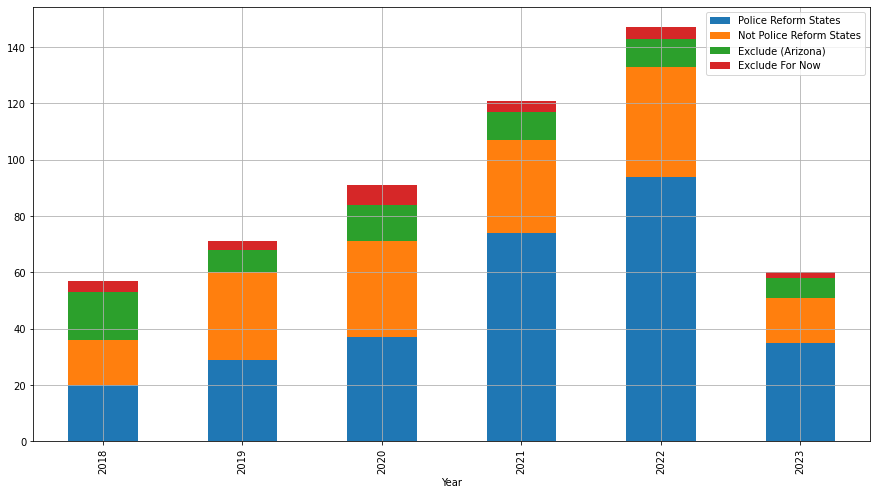

In [97]:
reform_state_counts.plot.bar(x='Year', stacked=True, figsize=(15,8), grid=True)

In [94]:
waiver_az_2018.value_counts('Reform State Status')

Reform State Status
Reform State         20
Exclude (Arizona)    17
Not Reform State     16
Exclude For Now       4
Name: count, dtype: int64

In [95]:
waiver_az_2019.value_counts('Reform State Status')

Reform State Status
Not Reform State     31
Reform State         29
Exclude (Arizona)     8
Exclude For Now       3
Name: count, dtype: int64

In [71]:
waiver_az_2020.value_counts('Reform State Status', normalize=True)

Reform State Status
Reform State         0.406593
Not Reform State     0.373626
Exclude (Arizona)    0.142857
Exclude For Now      0.076923
Name: proportion, dtype: float64

In [72]:
waiver_az_2021.value_counts('Reform State Status', normalize=True)

Reform State Status
Reform State         0.611570
Not Reform State     0.272727
Exclude (Arizona)    0.082645
Exclude For Now      0.033058
Name: proportion, dtype: float64

In [73]:
waiver_az_2022.value_counts('Reform State Status', normalize=True)

Reform State Status
Reform State         0.639456
Not Reform State     0.265306
Exclude (Arizona)    0.068027
Exclude For Now      0.027211
Name: proportion, dtype: float64

In [91]:
waiver_az_2023.value_counts('Reform State Status')

Reform State Status
Reform State         35
Not Reform State     16
Exclude (Arizona)     7
Exclude For Now       2
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Count of Police Reform State Transfers'>

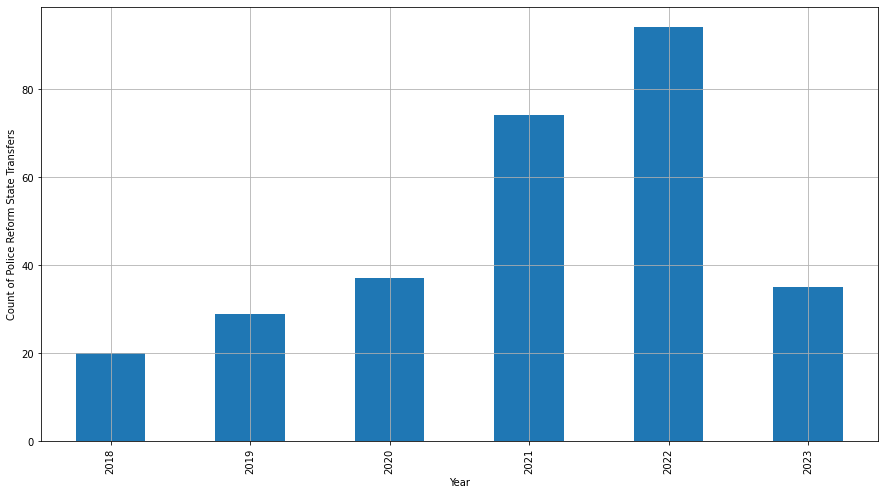

In [89]:
reform_counts_by_year = reform_states.value_counts('Year').sort_index(ascending=True)

reform_counts_by_year.plot.bar(xlabel='Year', ylabel='Count of Police Reform State Transfers', figsize=(15,8), grid=True)